In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, Dropout, MaxPool2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/Digit recognizer/train.csv")

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
class config:
  epochs = 50
  batch_size = 128
  img_size = 28
  img_channel = 1
  nb_cls = 10
  opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/drive/MyDrive/Colab Notebooks/Kaggle/Digit recognizer/',
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_data = np.array(df)

In [ ]:
train_data.shape

(42000, 785)

In [ ]:
images = train_data[:,1:].reshape(train_data.shape[0],config.img_size,config.img_size,config.img_channel)
images = images / 255.0

In [ ]:
labels = train_data[:,0].astype(np.int8)

(28, 280)


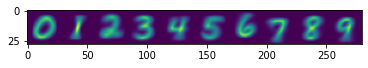

In [ ]:
mean_images = [np.mean(images[labels == i].reshape(-1, config.img_size, config.img_size), axis=0) for i in range(10)]
concat_image = np.concatenate(mean_images, axis=1)
print(concat_image.shape)
plt.imshow(concat_image)
plt.show()

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [ ]:
def net(config):
  model = Sequential([
    Conv2D(64,(3,3),activation='relu', input_shape=(config.img_size,config.img_size,config.img_channel)),
    MaxPool2D(2,2),
    Dropout(0.25),
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.25),
    Conv2D(256,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(config.nb_cls,activation='softmax')
  ])
  model.compile(
      optimizer = config.opt,
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
  )
  return model

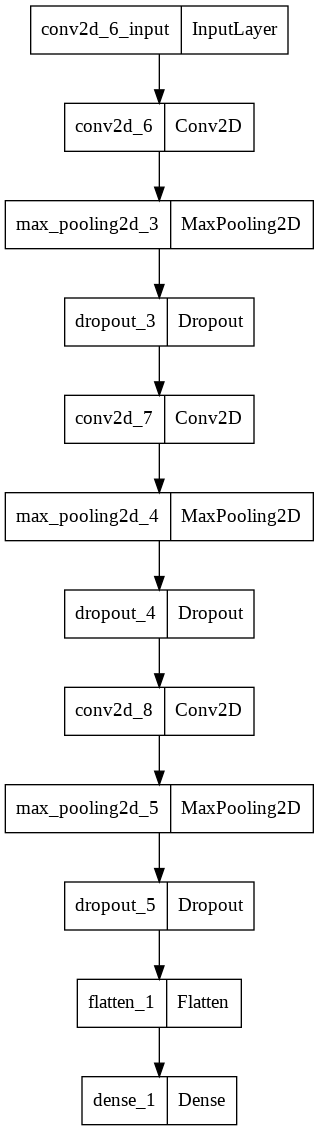

In [ ]:
new_model = net(config)
tf.keras.utils.plot_model(new_model)

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 128)        

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(images, labels, test_size = 0.1, random_state=2)

In [ ]:
#Data Augmentation 
datagen = ImageDataGenerator(
        featurewise_center=False, # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#datagen.fit(X_train)
train_gen = datagen.flow(X_train,Y_train, batch_size=config.batch_size)

In [ ]:
%%time

history = new_model.fit(train_gen, epochs=10, validation_data=(X_val, Y_val),callbacks=[config.model_checkpoint], verbose=1)

Epoch 1/10
296/296 [==============================] - 111s 373ms/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.0256 - val_accuracy: 0.9919
Epoch 2/10
296/296 [==============================] - 111s 373ms/step - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0250 - val_accuracy: 0.9921
Epoch 3/10
296/296 [==============================] - 110s 373ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.0300 - val_accuracy: 0.9931
Epoch 4/10
296/296 [==============================] - 111s 375ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0258 - val_accuracy: 0.9919
Epoch 5/10
296/296 [==============================] - 111s 374ms/step - loss: 0.0549 - accuracy: 0.9826 - val_loss: 0.0298 - val_accuracy: 0.9907
Epoch 6/10
296/296 [==============================] - 111s 374ms/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0277 - val_accuracy: 0.9924
Epoch 7/10
296/296 [==============================] - 111s 373ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0240 -

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/Digit recognizer/test.csv")

In [ ]:
test = np.array(test_df)
test.shape

(28000, 784)

In [ ]:
images_test = test[:,:].reshape(test.shape[0],config.img_size,config.img_size,config.img_channel)
images_test = images_test / 255.0

In [ ]:
predic = np.argmax(new_model.predict(images_test), axis = -1)

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/Digit recognizer/sample_submission.csv")

In [ ]:
submission['Label'] = predic

In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Digit recognizer/sample_submission.csv', index=False)

In [ ]:
def save_model(root, model):
    model_json = model.to_json()
    with open(root + "model.json", "w") as model_file:
        model_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(root + "weights.h5")
    print('Model and weights saved')
    return

In [ ]:
save_model('/content/drive/MyDrive/Colab Notebooks/Kaggle/Digit recognizer/', new_model)

Model and weights saved
